# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [52]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

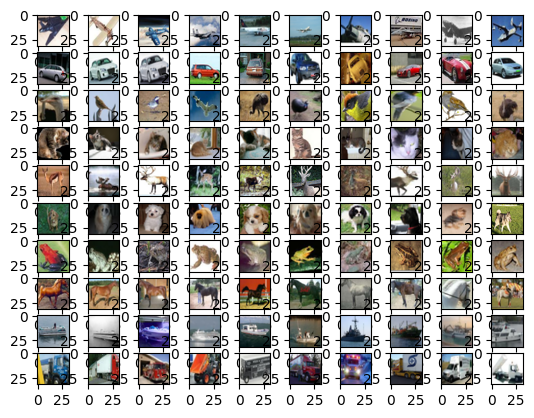

In [53]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

num_classes = 10
random_indices = []

for i in range(0, num_classes):
  class_indices = np.where(y_train == i)[0]
  random_indices.append(np.random.choice(class_indices, 10, replace=False))

images = x_train[np.array(random_indices).flatten()]

for index, i in enumerate(images):
  plt.subplot(10, 10, index + 1)
  plt.imshow(i.astype('uint8'))

plt.show()

# convert labels to one-hot encoded form
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# normalize color of images (255)
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [56]:
print(x_test[0])
print(y_test[0])

[[[0.61960787 0.4392157  0.19215687]
  [0.62352943 0.43529412 0.18431373]
  [0.64705884 0.45490196 0.2       ]
  ...
  [0.5372549  0.37254903 0.14117648]
  [0.49411765 0.35686275 0.14117648]
  [0.45490196 0.33333334 0.12941177]]

 [[0.59607846 0.4392157  0.2       ]
  [0.5921569  0.43137255 0.15686275]
  [0.62352943 0.44705883 0.1764706 ]
  ...
  [0.53333336 0.37254903 0.12156863]
  [0.49019608 0.35686275 0.1254902 ]
  [0.46666667 0.34509805 0.13333334]]

 [[0.5921569  0.43137255 0.18431373]
  [0.5921569  0.42745098 0.12941177]
  [0.61960787 0.43529412 0.14117648]
  ...
  [0.54509807 0.38431373 0.13333334]
  [0.50980395 0.37254903 0.13333334]
  [0.47058824 0.34901962 0.12941177]]

 ...

 [[0.26666668 0.4862745  0.69411767]
  [0.16470589 0.39215687 0.5803922 ]
  [0.12156863 0.34509805 0.5372549 ]
  ...
  [0.14901961 0.38039216 0.57254905]
  [0.05098039 0.2509804  0.42352942]
  [0.15686275 0.33333334 0.49803922]]

 [[0.23921569 0.45490196 0.65882355]
  [0.19215687 0.4        0.5803922 ]


## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer.

Use the input as (32,32,3).

The filter maps can then be flattened to provide features to the classifier.

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [39]:
from keras.backend import clear_session
clear_session()

In [60]:
from tensorflow import keras
from tensorflow.keras import layers

input_shape = (32, 32, 3)

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(100),
        layers.Dense(num_classes, activation="softmax")
    ]
)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [64]:
epochs = 50
batch_size = 512

model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.5675 - loss: 1.2447
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5685 - loss: 1.2467
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5704 - loss: 1.2398
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5715 - loss: 1.2351
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5755 - loss: 1.2267
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5732 - loss: 1.2371
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5752 - loss: 1.2263
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5839 - loss: 1.2094
Epoch 9/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5824 - loss: 1.2039
Epoch 10/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5829 - loss: 1.2107
Epoch 11/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5822 - loss: 1.2081
Epoch 12/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5833 - l

*   Plot the cross entropy loss curve and the accuracy curve

Test loss: 1.1897259950637817
Test accuracy: 0.5852000117301941
{'accuracy': [0.5669400095939636, 0.5689799785614014, 0.5703399777412415, 0.5734000205993652, 0.5742999911308289, 0.5768399834632874, 0.5751000046730042, 0.5790200233459473, 0.5799400210380554, 0.5817400217056274, 0.5834599733352661, 0.5862399935722351, 0.586359977722168, 0.5886800289154053, 0.5903800129890442, 0.5892199873924255, 0.59170001745224, 0.5935400128364563, 0.5961199998855591, 0.5964999794960022, 0.5993800163269043, 0.5977200269699097, 0.5989800095558167, 0.6018199920654297, 0.6029199957847595, 0.6033400297164917, 0.6039800047874451, 0.606220006942749, 0.6067600250244141, 0.6082800030708313, 0.6084200143814087, 0.6098600029945374, 0.6111000180244446, 0.6114599704742432, 0.6138399839401245, 0.6140999794006348, 0.6167200207710266, 0.6187000274658203, 0.6162800192832947, 0.6192799806594849, 0.6209800243377686, 0.6222400069236755, 0.6224600076675415, 0.6245800256729126, 0.6258000135421753, 0.6258999705314636, 0.6260

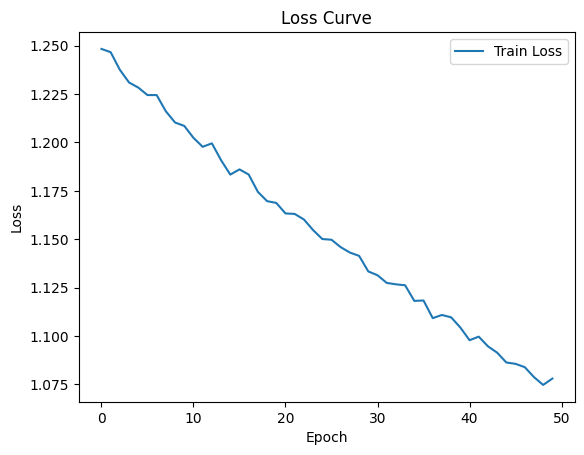

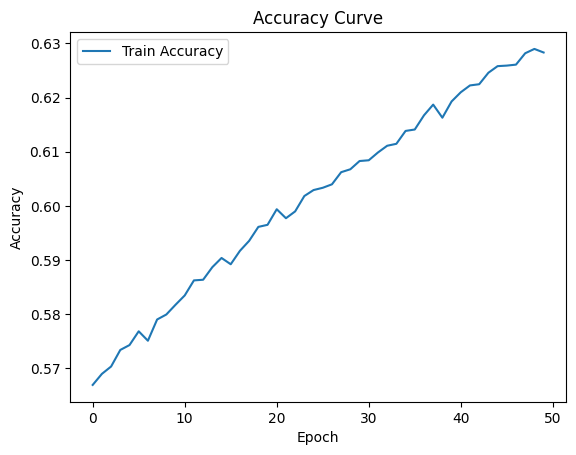

In [70]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
print(history.history)

plt.plot(history.history['loss'], label='Train Loss')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3.

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [71]:
from keras.backend import clear_session
clear_session()

In [77]:
from tensorflow.keras.applications import VGG16


vgg_base_model = VGG16(input_shape=input_shape, include_top=False)

vgg_model = keras.Sequential(
    [
        vgg_base_model,
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same'),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2), padding='same'),
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dense(num_classes, activation="softmax")
    ]
)


*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [78]:
vgg_model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
history = vgg_model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size)

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 59s 339ms/step - accuracy: 0.1166 - loss: 2.3014
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 167ms/step - accuracy: 0.2090 - loss: 2.2904
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 170ms/step - accuracy: 0.2443 - loss: 2.1771
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 172ms/step - accuracy: 0.3078 - loss: 1.9869
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 20s 170ms/step - accuracy: 0.4065 - loss: 1.6934
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 20s 168ms/step - accuracy: 0.5186 - loss: 1.3794
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 20s 169ms/step - accuracy: 0.5936 - loss: 1.1616
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 170ms/step - accuracy: 0.6361 - loss: 1.0757
Epoch 9/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 17s 171ms/step - accuracy: 0.6920 - loss: 0.8956
Epoch 10/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 20s 169ms/step - accuracy: 0.7090 - loss: 0.8452
Epoch 11/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 20s 169ms/step - accuracy: 0.7396 - loss: 0.7559
Epoch 12/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 21

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.


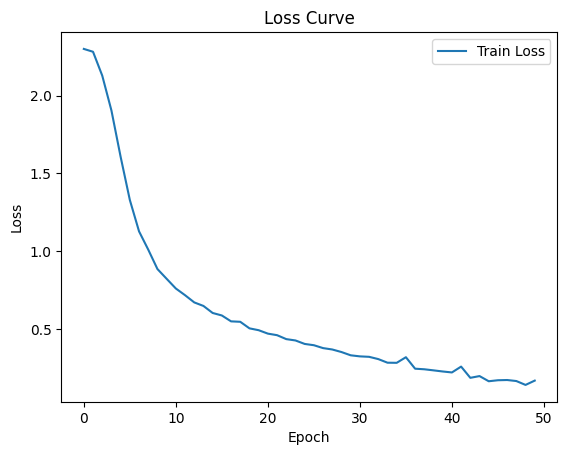

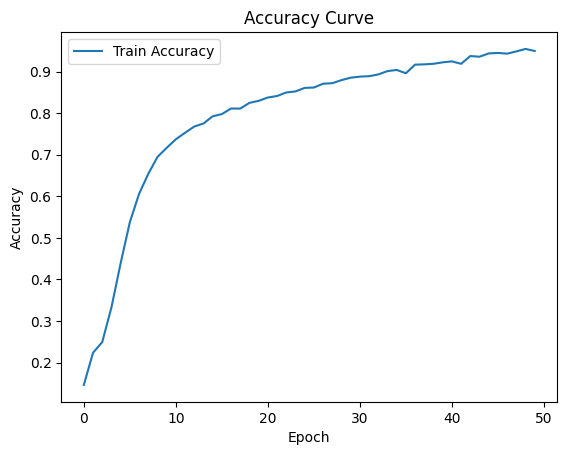

In [81]:
plt.plot(history.history['loss'], label='Train Loss')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Comment on the observation**

The deeper model performs way better

...

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


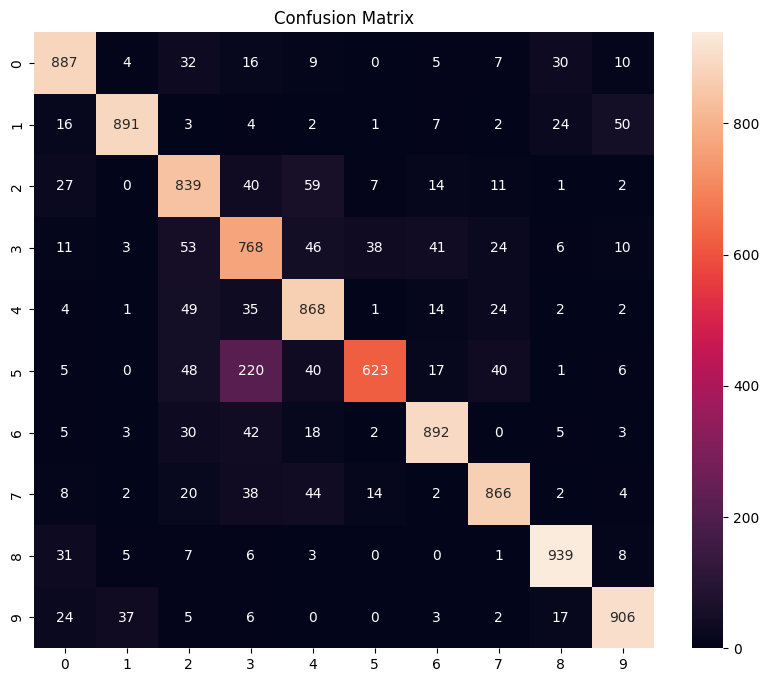

In [87]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = vgg_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

**Comment here :**

what stands out is that dogs and cats are often confused with each other.

...

*    Print the test accuracy for the trained model.

In [84]:
score = vgg_model.evaluate(x_test, y_test, verbose=0)

print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.5160254240036011
Test accuracy: 0.8478999733924866


## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer.

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling.

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [90]:
from keras.backend import clear_session
clear_session()

In [93]:
import tensorflow as tf

x_train_resized = tf.image.resize(x_train, [64, 64])
x_test_resized = tf.image.resize(x_test, [64, 64])

vgg_base_model = VGG16(input_shape=(64, 64, 3), include_top=False)

vgg_model_2 = keras.Sequential(
    [
        vgg_base_model,
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu", padding='same'),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu", padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2), padding='same'),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu", padding='same'),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu", padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2), padding='same'),
        layers.Conv2D(256, kernel_size=(3, 3), activation="relu", padding='same'),
        layers.Conv2D(256, kernel_size=(3, 3), activation="relu", padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2), padding='same'),
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dense(num_classes, activation="softmax")
    ]
)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [94]:
vgg_model_2.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
history = vgg_model_2.fit(x_train_resized, y_train, epochs=10, batch_size=512)

Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 141s 962ms/step - accuracy: 0.1076 - loss: 2.3025
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 59s 598ms/step - accuracy: 0.1085 - loss: 2.3025
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 83s 605ms/step - accuracy: 0.1160 - loss: 2.3025
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 82s 607ms/step - accuracy: 0.1181 - loss: 2.3024
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 82s 604ms/step - accuracy: 0.1363 - loss: 2.3024
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 82s 607ms/step - accuracy: 0.1168 - loss: 2.3024
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 82s 604ms/step - accuracy: 0.1284 - loss: 2.3024
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 82s 606ms/step - accuracy: 0.1320 - loss: 2.3023
Epoch 9/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 82s 607ms/step - accuracy: 0.1559 - loss: 2.3023
Epoch 10/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 82s 606ms/step - accuracy: 0.1451 - loss: 2.3022


313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step


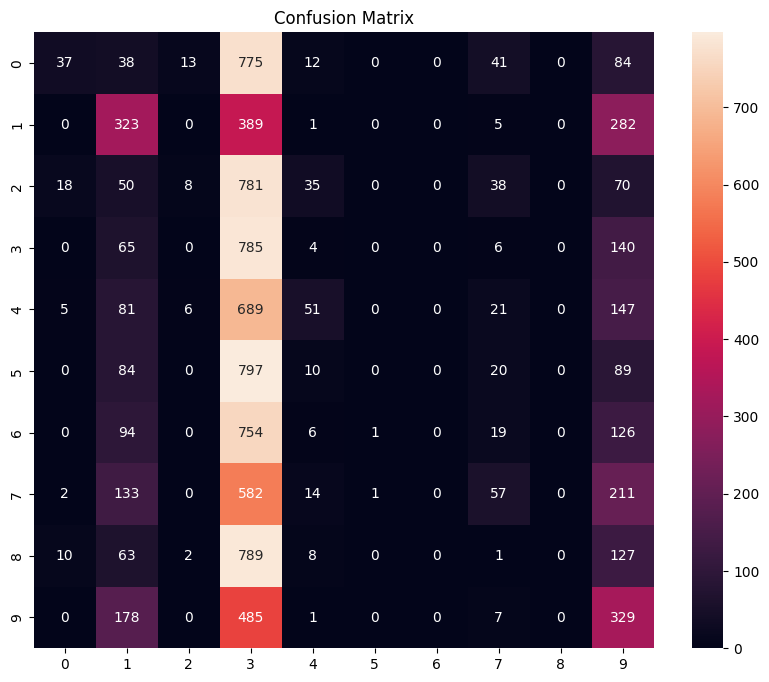

In [95]:
y_pred = vgg_model_2.predict(x_test_resized)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:
- It is applied after each neuron output and decides how strongly a neuron is activated.
- They ensure that a neural network can learn non-linear relationships.

2 - Key Differences between sigmoid and softmax:
- sigmoid: it is only for binary classifcation
- softmax: When you have more than 2 classes

3 - Key Differences between categorical crossentropy and binary crossentropy loss:
- categorical crossentropy: multi class classification
- binary crossentropy: binary classification
